In [ ]:
!pip install transformers 

In [41]:
from transformers import pipeline
from PIL import Image
import requests 

import numpy as np
import cv2

In [42]:
pipe = pipeline('depth-estimation')

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
url = 'https://www.ikea.com/images/a-slattum-upholstered-bed-and-various-white-nordli-chests-of-6b6a06f902c303389a40adc08c3512fc.jpg'
image = Image.open(requests.get(url, stream=True).raw)


In [44]:
result = pipe(image)

print(result)

{'predicted_depth': tensor([[[16.6096, 16.5334, 16.4692,  ..., 20.9979, 21.3385, 21.0497],
         [16.5189, 16.4925, 16.4528,  ..., 21.1657, 21.3235, 21.3432],
         [16.4719, 16.4995, 16.3995,  ..., 21.2666, 21.3197, 21.3090],
         ...,
         [36.9648, 37.1462, 37.0909,  ..., 26.8432, 26.8431, 26.8739],
         [37.0675, 37.1436, 37.1692,  ..., 27.0635, 27.0671, 27.0608],
         [37.0482, 37.1877, 37.2007,  ..., 27.1750, 27.2104, 27.0839]]]), 'depth': <PIL.Image.Image image mode=L size=1400x788 at 0x7F1FF2413E10>}


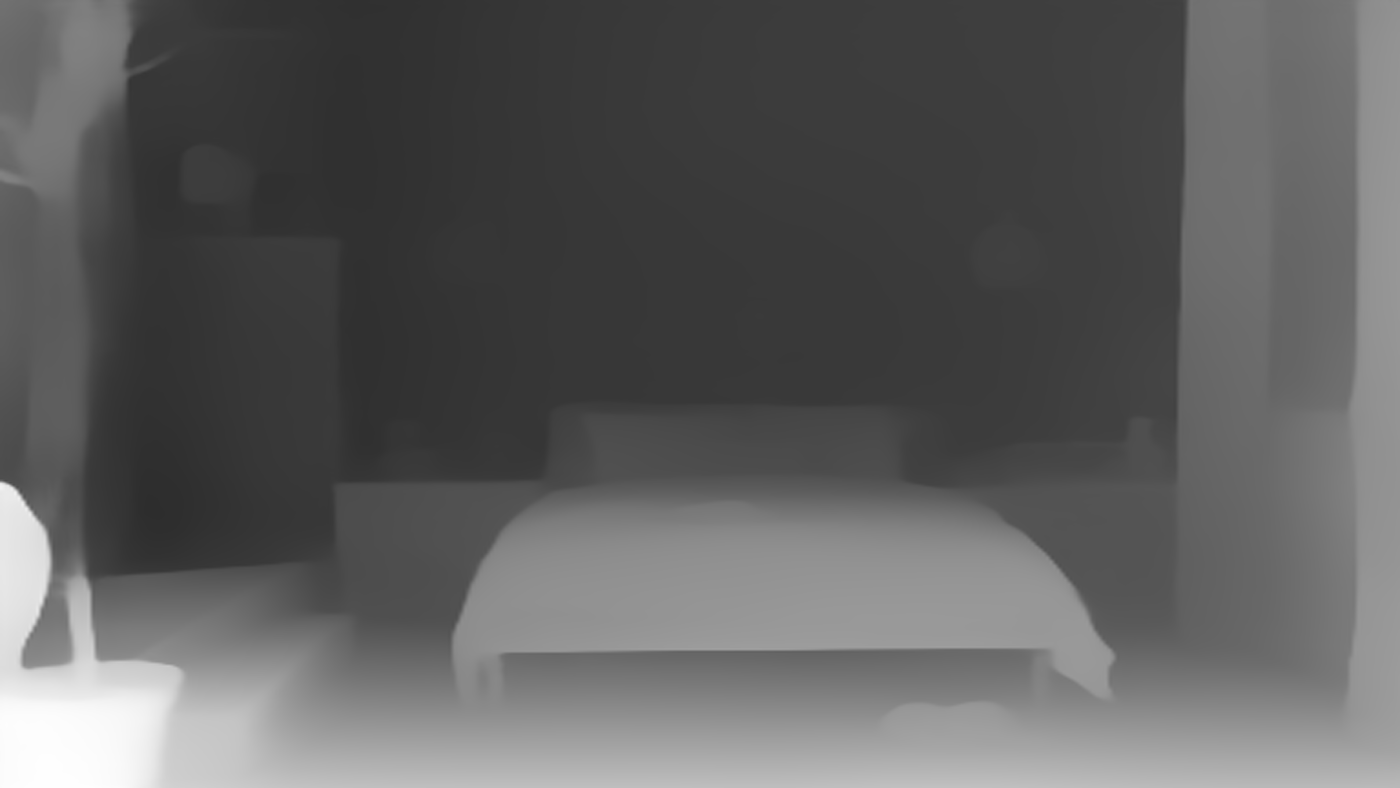

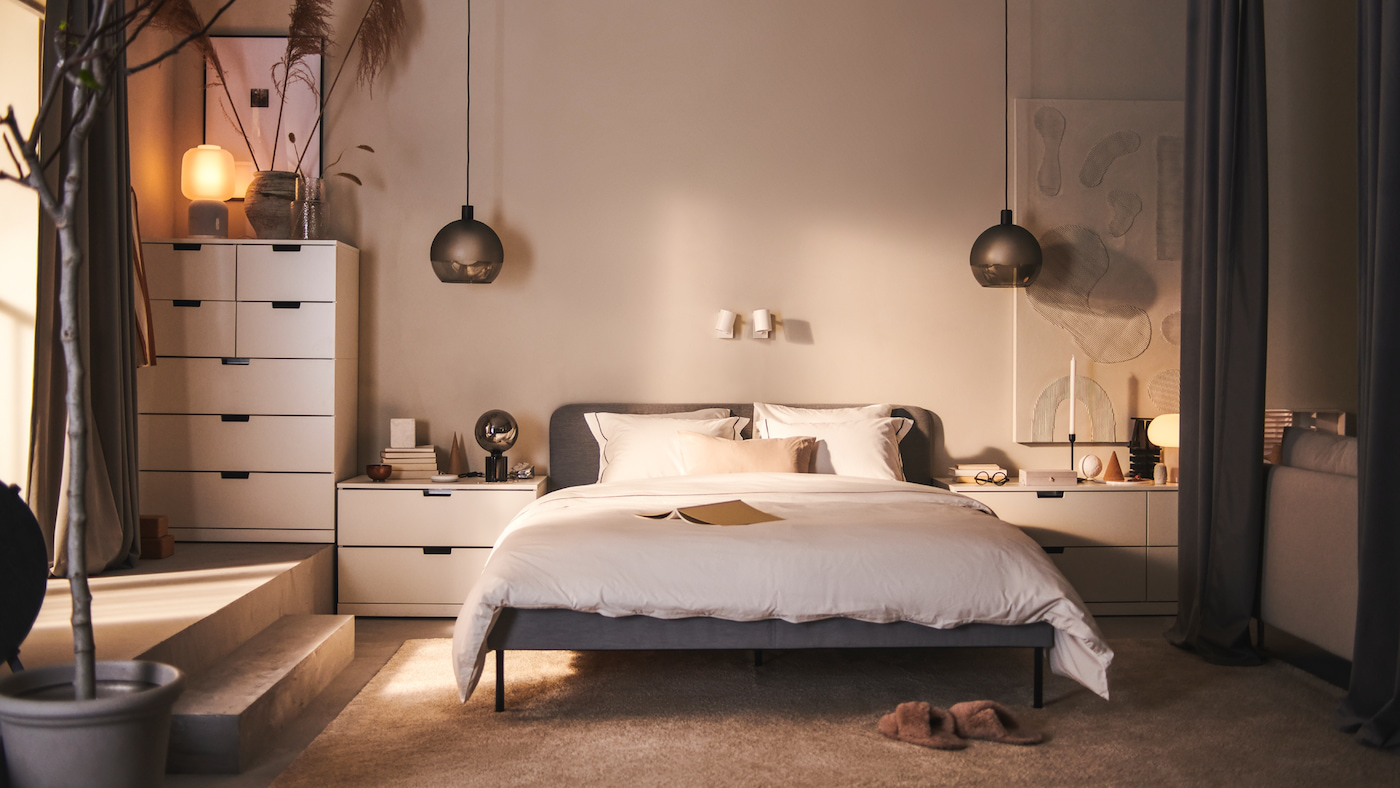

In [45]:
display(result['depth'], image)

In [7]:
# depth aware bir foto yerleştir

In [ ]:
result_np = np.array(result['depth'])

print(result_np)

In [22]:
result_np_filtered = result_np > 150 

In [ ]:
print(result_np_filtered)

In [36]:
img_np = np.array(image)

In [39]:
img_np_masked = cv2.bitwise_and(img_np, img_np, mask=result_np_filtered.astype(np.uint8))